# Configuração Inicial

## Importação de Bibliotecas

Importação das bibliotecas que serão usadas: pandas para manipulação dos dados, matplotlib.pyplot e seaborn para a geração dos gráficos.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Carregar CSV

In [ ]:
plt.style.use('seaborn-v0_8')
sns.set_theme(context="notebook", style="whitegrid")

df_raw = pd.read_csv('Data Layer\Raw\dados_brutos.csv')
df_raw_temp = df_raw.copy()

print(list(df_raw_temp.columns))

['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']


## Análise de dados faltantes por coluna

In [31]:
missing_data = pd.DataFrame({
    'Total': len(df_raw),
    'Nulls': df_raw.isnull().sum(),
})

missing_data['% Missing'] = (
    missing_data['Nulls'] / len(df_raw) * 100
).round(2)

missing_data = missing_data.sort_values('% Missing', ascending=False)
missing_data

,Total,Nulls,% Missing
Incomplete Rides Reason,150000,141000,94.0
Incomplete Rides,150000,141000,94.0
Reason for cancelling by Customer,150000,139500,93.0
Cancelled Rides by Customer,150000,139500,93.0
Cancelled Rides by Driver,150000,123000,82.0
Driver Cancellation Reason,150000,123000,82.0
Driver Ratings,150000,57000,38.0
Customer Rating,150000,57000,38.0
Avg CTAT,150000,48000,32.0
Ride Distance,150000,48000,32.0


## Análise de dados repetidos por coluna

In [32]:
duplicados = pd.DataFrame({
    'Singular values': df_raw.nunique(),
    'Repeated Values': df_raw.count() - df_raw.nunique(),
    '% Repeated': (
        (df_raw.count() - df_raw.nunique()) / df_raw.count() * 100
    ).round(2),
}).sort_values('% Repeated', ascending=False)

duplicados

,Singular values,Repeated Values,% Repeated
Booking Status,5,149995,100.00
Cancelled Rides by Driver,1,26999,100.00
Payment Method,5,101995,100.00
Vehicle Type,7,149993,100.00
Cancelled Rides by Customer,1,10499,99.99
Driver Cancellation Reason,4,26996,99.99
Incomplete Rides,1,8999,99.99
Driver Ratings,21,92979,99.98
Customer Rating,21,92979,99.98
Incomplete Rides Reason,3,8997,99.97


In [34]:
total_lines = len(df_raw)
lines_duplicated = df_raw.duplicated().sum()

print(f'Total number of lines: {total_lines}')
print(f'Number of duplicated lines: {lines_duplicated}')

Total number of lines: 150000
Number of duplicated lines: 0


## Análise de horário do agendamento com outras informações

### Rides x Time;

### Time x Price (Booking Value);

### Time x Vehicle Type

### Time x AvgCTAT

### Time x Pickup Location

### Time x Destination Location

### Time x Dia de semana

### Time x Booking Status

### Time x Cancellation Reason

## Análise de estado do agendamento

### Booking Status x Vehicle Type

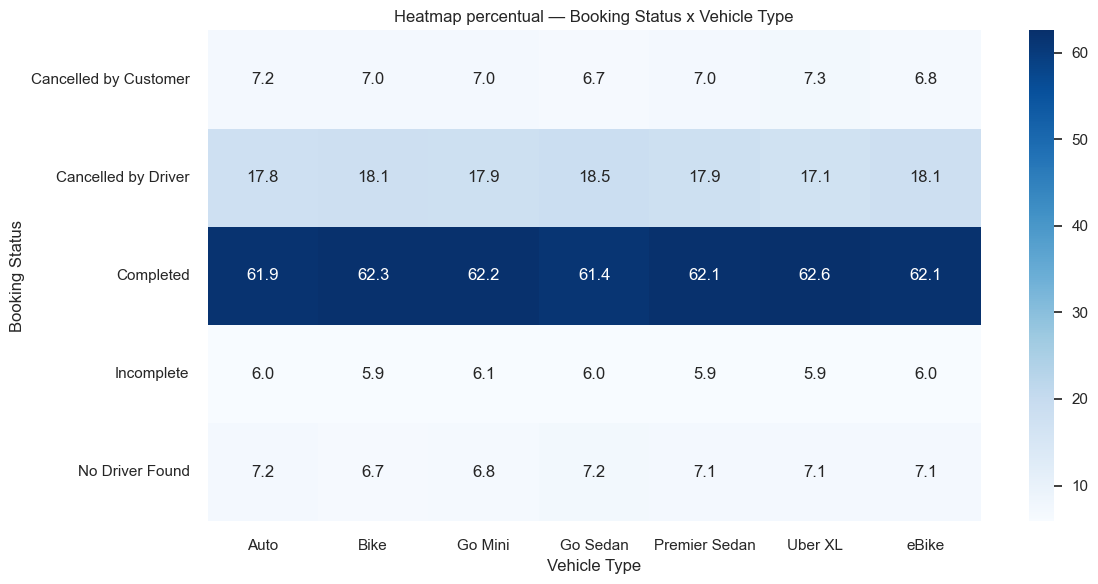

In [ ]:
bookingXvehicle = pd.crosstab(
    df_raw_temp['Booking Status'],
    df_raw_temp['Vehicle Type']
)

tabela_pct = bookingXvehicle.div(bookingXvehicle.sum(axis=0), axis=1) * 100

plt.figure(figsize=(12, 6))

sns.heatmap(
    tabela_pct,
    annot=True,
    fmt=".1f",
    cmap="Blues"
)

plt.title('Heatmap percentual — Booking Status x Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Booking Status')
plt.tight_layout()
plt.show()


## Análise da quantidade de corridas por usuário

### Customer ID x Amount of Rides

## Análise de tipo de veículo

### Vehicle Type x Ride Distance 

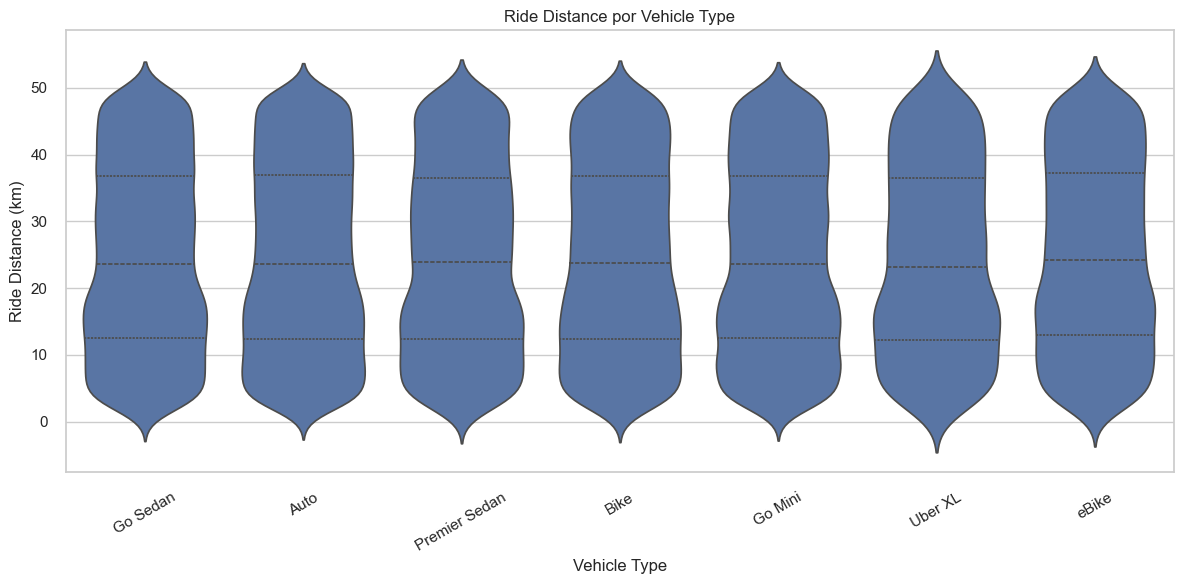

In [ ]:
df_raw_temp['Ride Distance'] = pd.to_numeric(df_raw_temp['Ride Distance'], errors='coerce')

df_plot = df_raw_temp.dropna(subset=['Vehicle Type', 'Ride Distance'])

plt.figure(figsize=(12, 6))

sns.violinplot(
    data=df_plot,
    x='Vehicle Type',
    y='Ride Distance',
    inner='quartile'
)

plt.title('Ride Distance por Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Ride Distance (km)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Vehicle Type x Avg CTAT

### Vehicle Type x Price

### Vehicle Type x Cancellation reason

### Vehicle Type x Incomplete Reason

### Vehicle Type x Pickup Region

### Vehicle Type x Dia de semana

## Análise do local de embarque

### Pickup Location x Booking Status

### Pickup Location x Price

### Pickup Location x AvgCTAT

## Análise Booking Value x Booking Status

## Análise Ride Distance x Booking Status

## Análise Customer Rating x Driver Rating

## Payment Method x Price

## Análise de Outliers